### Dog Breed Classifier with FastAi v1

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai import *
from fastai.vision import *

In [3]:
path = "./data/dog_breed/"
!ls "./data"

dog_breed  sample_submission.csv.zip


## View data

In [7]:
import pandas as pd

df = pd.read_csv(path+"/train/labels.csv")
df.id = df["id"] + ".jpg"
df.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [8]:
np.random.seed(42)
data = ImageDataBunch.from_df(path+"/train", df, valid_pct=0.2, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

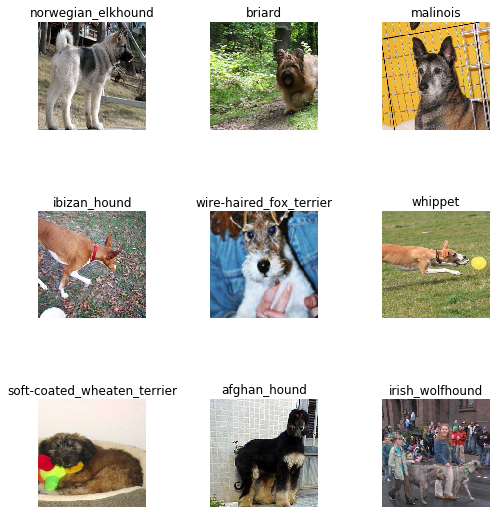

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [29]:
print(data.classes)

['dingo', 'pekinese', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'scottish_deerhound', 'walker_hound', 'bluetick', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'affenpinscher', 'ibizan_hound', 'boston_bull', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'giant_schnauzer', 'shih-tzu', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'english_setter', 'kelpie', 'papillon', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'weimaraner', 'irish_terrier', 'maltese_dog', 'malinois', 'pug', 'boxer', 'airedale', 'leonberg', 'bull_mastiff', 'bernese_mountain_dog', 'entlebucher', 'american_staffordshire_terrier', 'lhasa', 'italian_greyhound', 'clumber', 'border_collie

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dingo',
  'pekinese',
  'golden_retriever',
  'bedlington_terrier',
  'borzoi',
  'scottish_deerhound',
  'walker_hound',
  'bluetick',
  'african_hunting_dog',
  'wire-haired_fox_terrier',
  'redbone',
  'lakeland_terrier',
  'otterhound',
  'standard_schnauzer',
  'irish_water_spaniel',
  'black-and-tan_coonhound',
  'affenpinscher',
  'ibizan_hound',
  'boston_bull',
  'dhole',
  'toy_poodle',
  'border_terrier',
  'tibetan_terrier',
  'norwegian_elkhound',
  'giant_schnauzer',
  'shih-tzu',
  'german_shepherd',
  'greater_swiss_mountain_dog',
  'basset',
  'schipperke',
  'rhodesian_ridgeback',
  'irish_setter',
  'appenzeller',
  'bloodhound',
  'samoyed',
  'miniature_schnauzer',
  'brittany_spaniel',
  'english_setter',
  'kelpie',
  'papillon',
  'collie',
  'malamute',
  'welsh_springer_spaniel',
  'chihuahua',
  'saluki',
  'weimaraner',
  'irish_terrier',
  'maltese_dog',
  'malinois',
  'pug',
  'boxer',
  'airedale',
  'leonberg',
  'bull_mastiff',
  'bernese_mountain_d

## Train model

In [11]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 62663340.91it/s]


In [12]:
learn.fit_one_cycle(5)

Total time: 11:46
epoch  train_loss  valid_loss  error_rate
1      1.574902    0.629111    0.180528    (02:34)
2      0.840734    0.522194    0.161937    (02:17)
3      0.644585    0.513704    0.155577    (02:18)
4      0.431693    0.437124    0.132583    (02:18)
5      0.350351    0.434238    0.138454    (02:18)



In [14]:
learn.save('stage-1')

In [15]:
learn.load('stage-1')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f652d97b588>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


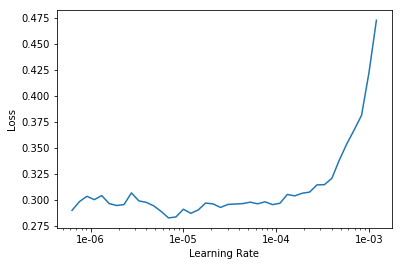

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

Total time: 15:10
epoch  train_loss  valid_loss  error_rate
1      0.292901    0.424762    0.133562    (03:03)
2      0.292836    0.424672    0.130626    (03:01)
3      0.272151    0.431771    0.131115    (03:01)
4      0.241474    0.427799    0.123777    (03:01)
5      0.225091    0.424177    0.129648    (03:01)



In [20]:
learn.save('stage-2')

## Interpretation

In [21]:
learn.load('stage-2')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f652d97b588>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

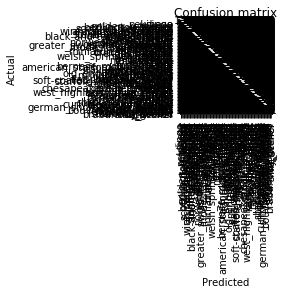

In [23]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [26]:
from fastai.widgets import *

#losses,idxs = interp.top_losses()
#top_loss_paths = data.valid_ds.x[idxs]

ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)


Now we can pass in these paths to our widget.

In [28]:
ImageDeleter(ds, idxs)

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

In [ ]:
data.classes

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
# fastai.defaults.device = torch.device('cpu')

In [ ]:
img = open_image(path/'black'/'00000021.jpg')
img

In [ ]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) too low

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [ ]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

### Too many epochs

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))